<a href="https://colab.research.google.com/github/Saraeladham/Elevvo-Machine-Learning-Internship-Projects/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load Data and Info about data

First, I loaded the dataset and checked its structure.

Found ~6500 rows and 20 columns (mix of numeric + categorical).

This gave me a clear idea of the feature space and whether preprocessing was needed.


In [ ]:
stud_per=pd.read_csv('/content/StudentPerformanceFactors.csv')
stud_per.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
stud_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
stud_per.shape

(6607, 20)

# EDA and Visualization
I used `.describe()` to quickly understand ranges, means, and spreads.

This revealed `Exam_Score` had a suspicious max value of 101 (potential error).


**Outlier Detection**
I applied boxplots for
`Hours_Studied` and `Exam_Score`.

Used both Z-score and IQR methods to detect outliers.

**Observation:**

104 rows were flagged, but after manually inspecting, I found only 1 invalid row (Exam_Score = 101).

I dropped that row, since exam scores realistically should max out at 100.

 This showed me the importance of combining statistical methods with domain knowledge.

In [ ]:
# Summary statistics
stud_per.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


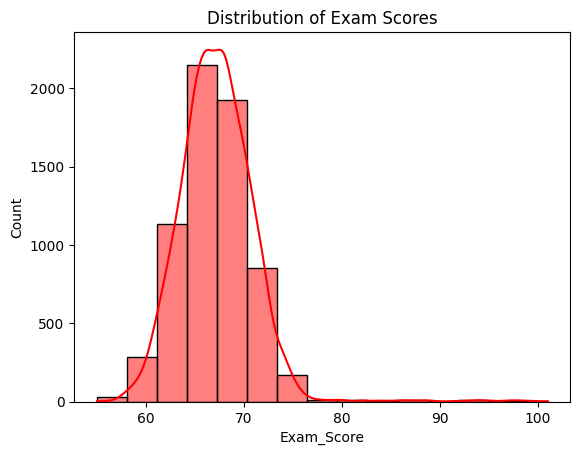

In [ ]:
sns.histplot(data=stud_per, x='Exam_Score', bins=15, kde=True, color="red")
plt.title("Distribution of Exam Scores")
plt.show()

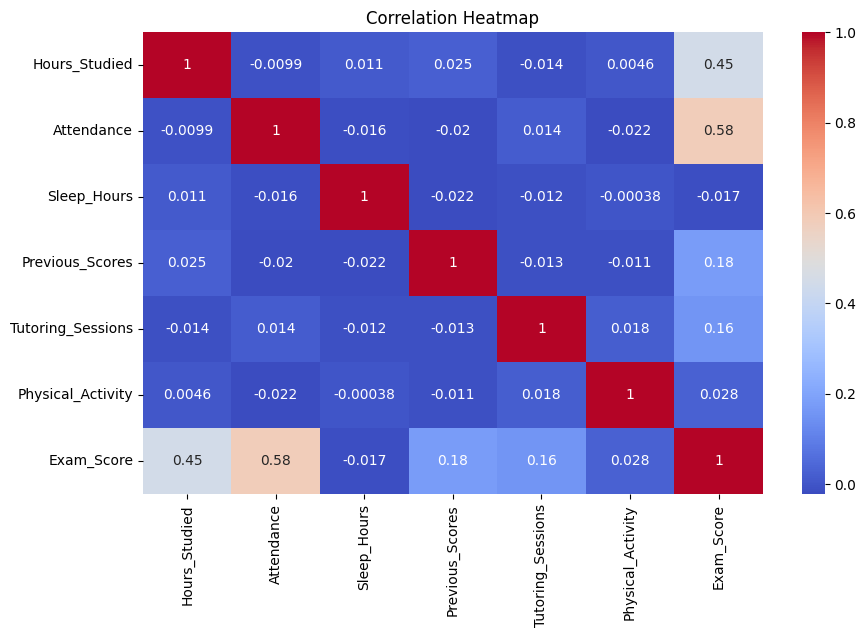

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(stud_per.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


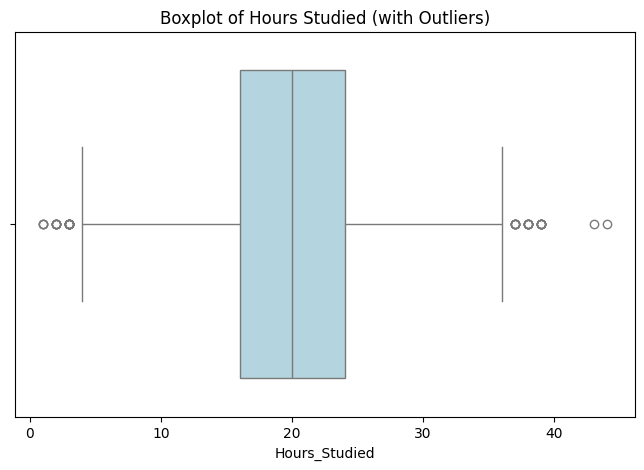

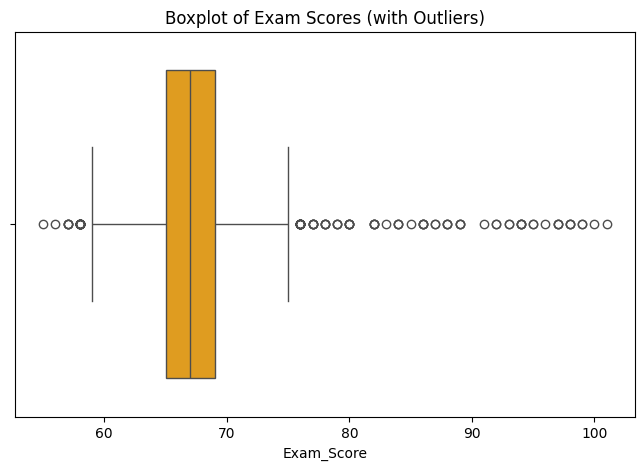

In [ ]:
# Checking for outliers

plt.figure(figsize=(8,5))
sns.boxplot(data=stud_per, x="Hours_Studied", color="lightblue")
plt.title("Boxplot of Hours Studied (with Outliers)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=stud_per, x="Exam_Score", color="orange")
plt.title("Boxplot of Exam Scores (with Outliers)")
plt.show()


In [ ]:
stud_per['Exam_Score'].describe()

,Exam_Score
count,6607.000000
mean,67.235659
std,3.890456
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


In [ ]:
# Check categorical Features
categorical_cols = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Extracurricular_Activities",
    "Motivation_Level",
    "Internet_Access",
    "Family_Income",
    "Teacher_Quality",
    "School_Type",
    "Peer_Influence",
    "Learning_Disabilities",
    "Parental_Education_Level",
    "Distance_from_Home",
    "Gender"
]

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(stud_per[col].value_counts())  # raw counts
    print("\n% Distribution:")
    print(stud_per[col].value_counts(normalize=True) * 100)  # percentages


--- Parental_Involvement ---
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

% Distribution:
Parental_Involvement
Medium    50.885425
High      28.878462
Low       20.236113
Name: proportion, dtype: float64

--- Access_to_Resources ---
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

% Distribution:
Access_to_Resources
Medium    50.234600
High      29.892538
Low       19.872862
Name: proportion, dtype: float64

--- Extracurricular_Activities ---
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

% Distribution:
Extracurricular_Activities
Yes    59.603451
No     40.396549
Name: proportion, dtype: float64

--- Motivation_Level ---
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

% Distribution:
Motivation_Level
Medium    50.718934
Low       29.317391
High      19.963675
Name: proportion, dtype: float64

--- Internet_Access ---
Interne

In [ ]:
# Correlation heatmap: Quickly see strongest predictors of Exam_Score
stud_per.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)


,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Physical_Activity,0.027824
Sleep_Hours,-0.017022


**Scatter & Boxplots**

**Scatterplot**: `Hours_Studied` vs `Exam_Score` → confirmed linear relationship.

**Boxplots**: categorical factors vs target (e.g., `Parental_Involvement`) → higher involvement linked with higher exam scores.

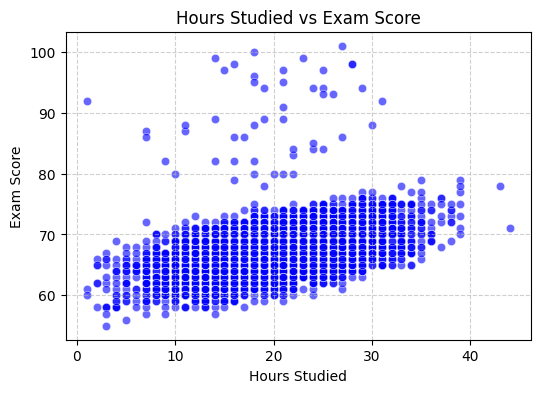

Text(0.5, 1.0, 'Parental Involvement vs Exam Score')

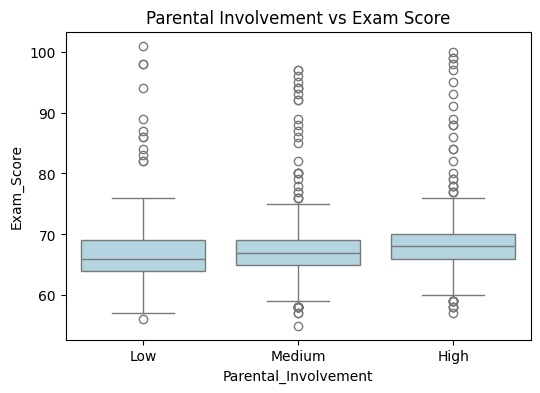

In [ ]:
#  Scatter Plot (Numerical)
plt.figure(figsize=(6,4))
sns.scatterplot(data=stud_per, x="Hours_Studied", y="Exam_Score", color="blue", alpha=0.6)

plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Boxplots (Categorical)
plt.figure(figsize=(6,4))
sns.boxplot(data=stud_per, x="Parental_Involvement", y="Exam_Score", color="lightblue")
plt.title("Parental Involvement vs Exam Score")

In [ ]:
# Z-score Outliers
def detect_outliers_zscore(stud_per, threshold=3):
    mean = np.mean(stud_per)
    std = np.std(stud_per)
    z_scores = [(x - mean) / std for x in stud_per]
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers[0]

outliers_idx = detect_outliers_zscore(stud_per["Exam_Score"])
print("Z-score Outliers at indices:", outliers_idx)

Z-score Outliers at indices: [  94  113  217  404  529  558  560  637  770  836  919 1099 1101 1107
 1109 1351 1525 1607 1844 1863 1957 2076 2292 2421 2425 2513 2595 2687
 2904 2954 3124 3141 3364 3457 3579 3924 3932 4192 4254 4297 4355 4405
 4531 4583 4666 4779 5125 5966 5989 6347 6393 6522]


In [ ]:
# IQR Outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers[0]

outliers_idx = detect_outliers_iqr(stud_per["Exam_Score"])
print("IQR Outliers at indices:", outliers_idx)


IQR Outliers at indices: [  94  106  113  209  217  404  529  558  560  637  668  770  836  919
 1099 1101 1107 1109 1165 1210 1351 1387 1418 1525 1607 1615 1750 1844
 1863 1957 2035 2076 2178 2265 2292 2411 2421 2425 2513 2533 2542 2544
 2556 2595 2687 2880 2904 2947 2954 3124 3141 3212 3241 3357 3364 3418
 3457 3493 3523 3543 3579 3593 3602 3716 3815 3924 3932 4033 4091 4192
 4247 4254 4297 4355 4405 4425 4458 4531 4583 4635 4639 4666 4697 4728
 4774 4779 5017 5125 5198 5507 5519 5719 5790 5907 5966 5989 6000 6040
 6202 6347 6393 6431 6522 6566]


In [ ]:
stud_per.loc[outliers_idx]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
106,31,100,Medium,Medium,No,7,59,Medium,Yes,2,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
217,19,70,Medium,Low,No,7,54,High,Yes,0,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
6431,4,60,Medium,Medium,Yes,7,55,Medium,Yes,2,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,58
6522,18,90,High,High,Yes,6,54,Low,Yes,1,Medium,High,Public,Negative,3,No,High School,Near,Female,95


In [ ]:
outliers = stud_per.loc[outliers_idx, "Exam_Score"]
print(outliers.describe())
print(outliers.sort_values().unique())


count    104.000000
mean      77.586538
std       13.967098
min       55.000000
25%       58.000000
50%       78.000000
75%       88.000000
max      101.000000
Name: Exam_Score, dtype: float64
[ 55  56  57  58  76  77  78  79  80  82  83  84  85  86  87  88  89  91
  92  93  94  95  96  97  98  99 100 101]


In [ ]:
'''Outlier detection flagged 104 rows. Upon inspection, only one row had an invalid Exam_Score of 101.
This row was removed; all other values are valid and retained'''
stud_per = stud_per[stud_per["Exam_Score"] <= 100]
stud_per.shape

(6606, 20)

# Data Pre-processing and Cleaning

**Missing Values**

Found missing values in:

*  `Teacher_Quality` (78 missing)
*  `Parental_Education_Level` (90 missing)

Imputed using mode (most frequent value), since they are categorical.

**Feature Selection**

Dropped redundant/weak features:


*  `Distance_from_Home` (not useful enough)
*  `Internet_Access`, `Family_Income`, `Gender` (too generic or weak predictors).






In [ ]:
# Checking for Nulls
stud_per.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Define Features & Target
X = stud_per.drop(columns=["Exam_Score"])
y = stud_per["Exam_Score"]

In [ ]:
# Drop columns
X = X.drop(columns=["Distance_from_Home", "Internet_Access", "Family_Income", "Gender"])


In [ ]:
# Handle the NaNs in Teacher_Quality and Parental_Education_Level:
X["Teacher_Quality"] = X["Teacher_Quality"].fillna(X["Teacher_Quality"].mode()[0])
X["Parental_Education_Level"] = X["Parental_Education_Level"].fillna(X["Parental_Education_Level"].mode()[0])


In [ ]:
# Separate numeric & categorical
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

**Feature Encoding**



*  Ordinal Encoding: for ordered categorical variables(`Parental_Involvement`, `Access_to_Resources`, `Motivation_Level`, `Teacher_Quality`, `Peer_Influence`, `Parental_Education_Level`).
*   One-Hot Encoding: for nominal categories
(`Extracurricular_Activities`, `School_Type`, `Learning_Disabilities`).

Used OrdinalEncoder and OneHotEncoder from scikit-learn to keep process scalable.

In [ ]:
# Encode Ordinal with OrdinalEncoder
ordinal_cols = [
    "Parental_Involvement",
    "Access_to_Resources",
    "Motivation_Level",
    "Teacher_Quality",
    "Peer_Influence",
    "Parental_Education_Level"
]

ordinal_categories = [
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Negative", "Neutral", "Positive"],
    ["High School", "College", "Postgraduate"]
]

ord_enc = OrdinalEncoder(categories=ordinal_categories)

X[ordinal_cols] = ord_enc.fit_transform(X[ordinal_cols])


In [ ]:
# Encode Nominal with OneHotEncoder
nominal_cols = ["Extracurricular_Activities", "School_Type", "Learning_Disabilities"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

ohe_arr  = ohe.fit_transform(X[nominal_cols])
ohe_cols = ohe.get_feature_names_out(nominal_cols)
ohe_df   = pd.DataFrame(ohe_arr, columns=ohe_cols, index=X.index)


X = pd.concat([X.drop(columns=nominal_cols), ohe_df], axis=1)

In [ ]:
#  Train-Test Split
# Choose 80/20 split → ensures enough data for training, with a reliable test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Scaling only on training data, with StandardScaler
scaler = StandardScaler()

# Fit only on training numeric columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Use the same scaler on test
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Model Building & Evaluation


*  Linear Regression
*   Polynomial Regression



In [ ]:
# MODEL BUILDING
# Linear Regression
lin_reg = LinearRegression()

# Train on training data
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test  = lin_reg.predict(X_test)


In [ ]:
# MODEL EVALUATION
# Training performance
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Test performance
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("📊 Training Performance:")
print(f"MAE:  {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²:   {r2_train:.2f}")

print("\n📊 Test Performance:")
print(f"MAE:  {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²:   {r2_test:.2f}")


📊 Training Performance:
MAE:  0.72
RMSE: 2.18
R²:   0.69

📊 Test Performance:
MAE:  0.65
RMSE: 1.65
R²:   0.79


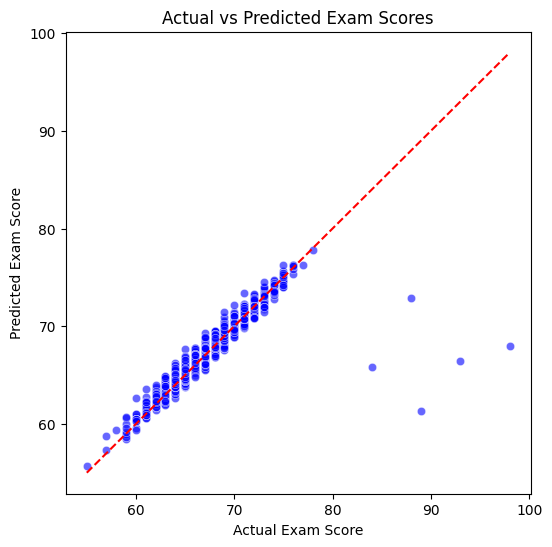

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # perfect line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)


In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# Predictions
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred  = poly_model.predict(X_test_poly)

# MODEL EVALUATION
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("📊 Training Performance:")
print("MAE: ", train_mae)
print("RMSE:", train_rmse)
print("R²:  ", train_r2)

print("\n📊 Test Performance:")
print("MAE: ", test_mae)
print("RMSE:", test_rmse)
print("R²:  ", test_r2)


📊 Training Performance:
MAE:  0.7636895682682935
RMSE: 2.1530827092162723
R²:   0.6988366683766261

📊 Test Performance:
MAE:  0.7092638300162762
RMSE: 1.684755904210025
R²:   0.7853633207594195


# Insights & Learnings

**Key Predictors**: Hours studied, previous scores, and parental involvement.

**Data Quality**: Outliers required manual domain validation (scores > 100 invalid).

**Modeling**: Linear regression worked well, polynomial didn’t add much.

**Final R²**: ~0.79 shows strong predictive ability with simple models.